#We will be using a dataset for the 2019-2020 La Liga season.

The first step will be to import the libraries we will be using

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col ,concat, lit , isnan, when, count, mean, min, max
import pyspark.sql.functions as F
import seaborn as sns
import six
import matplotlib.pyplot as plt

In [0]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Liberation Sans']

Creating the dataframe with the dataset.

In [0]:
df = spark.read.csv( "/FileStore/tables/laliga201920.csv" , inferSchema = True, header = True , sep=","   )

# Create a temporary view to query the dataframe using sql language

### Extract the top 10 scorers of the league

In [0]:
df.createOrReplaceTempView("df")
top_scorers = spark.sql('SELECT * FROM df ORDER BY goals desc LIMIT 10')
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,first_name,last_name,shirtNumber,played_time,appearances,played_games,starts,sub_on,sub_off,offsides,dribbles_successful,dribbles_unsuccessful,keypasses,assists,assists_intentional,assists_second_goal,through_balls,goals_conceded,goals_conceded_penalty,goals_conceded_outside_box,goals_conceded_inside_box,goals,goals_from_inside_box,goals_from_outside_box,goals_right_foot,goals_left_foot,goals_headed,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,shots_blocked,shots_attempts_from_set_pieces,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,passes_open_play,passes_open_play_successful,passes_backward,passes_forward,passes_leftside,passes_rightside,passes_short_successful,passes_short_unsuccessful,passes_long_successful,passes_long_unsuccessful,passes_own_half_successful,passes_own_half_unsuccessful,passes_opposition_half_successful,passes_opposition_half_unsuccessful,crosses_open_play_successful,crosses_open_play_unsuccessful,crosses_and_corners_unsuccessful,crosses_and_corners_successful,corners_won,corners_taken_include_short_corners,corners_into_box_successful,corners_into_box_unsuccessful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,tackles_total,tackles_won,tackles_lost,tackles_last_man,clearances,interceptions,recoveries,blocks
Barcelona,178,19054,Lionel Messi,Forward,null,Lionel,Messi,10,2880,33,33,32,1,1,13,182,81,68,21,20,1,36,30,5,4,26,25,16,9,2,23,null,5,5,115,71,44,4,44,43,1975,1631,344,1872,1539,335,640,714,286,1560,308,71,36,269,23,1389,408,6,30,87,27,47,77,16,35,482,283,199,469,273,196,13,10,3,21,10,11,null,1,7,56,null
Real Madrid,186,19927,Karim Benzema,Forward,null,Karim,Benzema,9,3152,37,37,36,1,15,27,38,30,51,8,8,1,9,22,2,null,22,21,20,1,14,4,2,5,5,107,60,47,5,17,1,1285,1108,177,1232,1055,379,259,282,365,1057,168,51,9,275,31,833,169,null,23,23,null,18,null,null,null,241,100,141,174,71,103,67,29,38,18,8,10,null,28,7,71,4
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,Gerard,Moreno,7,2752,35,35,33,2,13,16,60,35,44,5,4,null,9,38,8,7,31,18,18,null,4,13,1,1,2,71,35,36,3,18,null,963,717,246,927,681,243,215,335,170,652,216,65,30,264,55,464,240,11,49,49,11,16,1,null,null,422,182,240,279,126,153,143,56,87,19,8,11,null,48,10,98,3
Barcelona,178,39336,Luis Suárez,Forward,null,Luis,Suárez,9,2001,28,28,22,6,8,18,23,24,18,8,6,null,1,18,4,1,17,16,13,3,11,2,3,1,1,63,42,21,4,16,1,654,494,160,617,457,188,108,132,226,470,146,24,14,138,21,360,144,4,5,5,4,17,null,null,null,142,63,79,122,51,71,20,12,8,4,null,4,null,11,1,36,1
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,Raúl,García,22,2876,35,35,33,2,11,18,9,17,21,1,null,null,5,25,4,4,21,15,12,3,10,4,1,7,7,75,34,41,2,7,null,938,524,414,934,520,153,449,188,148,503,359,21,55,151,57,378,385,5,28,28,5,23,null,null,null,644,331,313,275,119,156,369,212,157,57,37,20,null,42,24,94,6
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,Lucas,Ocampos,5,2753,33,33,31,2,12,12,67,85,21,3,2,null,null,24,3,3,21,14,14,null,11,1,2,5,5,70,36,34,4,14,null,839,670,169,835,666,220,211,210,198,644,151,26,18,173,38,516,201,19,70,70,19,56,1,null,null,482,207,275,413,177,236,69,30,39,54,31,23,null,22,22,141,2
Celta de Vigo,176,40270,Iago Aspas,Forward,null,Iago,Aspas,10,3266,37,37,37,null,7,20,52,43,52,3,3,1,9,48,5,8,40,14,12,2,1,12,1,5,7,65,40,25,1,19,11,1262,973,289,1193,907,337,237,443,245,931,263,42,26,308,59,670,251,4,20,21,5,35,5,1,1,375,176,199,286,146,140,89,30,59,29,19,10,null,5,22,108,1
Mallorca,181,94273,Ante Budimir,Forward,null,Ante,Budimir,22,2780,35,35,33,2,18,16,20,27,11,2,null,null,null,53,13,11,42,13,13,null,1,8,3,2,2,46,22,24,2,10,null,578,370,208,544,336,136,169,164,109,368,206,2,2,115,25,256,188,1,5,5,1,18,1,null,null,584,264,320,234,100,134,350,164,186,31,15,16,null,29,8,52,4
Atlético d

### Extracting the top scorers for each team using the window and rank functions

In [0]:
window = Window.partitionBy(df['team']).orderBy(df['goals'].desc())

top_team_scorers =df.select('*', rank().over(window).alias('rank')) \
                     .filter(col('rank') <= 1)

display(top_team_scorers.select("team","player_name","goals"))

team,player_name,goals
Alavés,Jose Luis Mato Sanmartín,11
Alavés,Lucas Pérez,11
Athletic Club,Raúl García,15
Atlético de Madrid,Álvaro Morata,12
Barcelona,Lionel Messi,25
Celta de Vigo,Iago Aspas,14
Eibar,Fabián Orellana,8
Espanyol,David López,4
Espanyol,Lei Wu,4
Espanyol,Raúl de Tomás,4


# Preparing the dataframe to create a correlation heatmap for the top scorers

First we need to replace the null values with 0s

In [0]:
display(top_scorers.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in top_scorers.columns]))

team,team_id,player_id,player_name,position,known_name,first_name,last_name,shirtNumber,played_time,appearances,played_games,starts,sub_on,sub_off,offsides,dribbles_successful,dribbles_unsuccessful,keypasses,assists,assists_intentional,assists_second_goal,through_balls,goals_conceded,goals_conceded_penalty,goals_conceded_outside_box,goals_conceded_inside_box,goals,goals_from_inside_box,goals_from_outside_box,goals_right_foot,goals_left_foot,goals_headed,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,shots_blocked,shots_attempts_from_set_pieces,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,passes_open_play,passes_open_play_successful,passes_backward,passes_forward,passes_leftside,passes_rightside,passes_short_successful,passes_short_unsuccessful,passes_long_successful,passes_long_unsuccessful,passes_own_half_successful,passes_own_half_unsuccessful,passes_opposition_half_successful,passes_opposition_half_unsuccessful,crosses_open_play_successful,crosses_open_play_unsuccessful,crosses_and_corners_unsuccessful,crosses_and_corners_successful,corners_won,corners_taken_include_short_corners,corners_into_box_successful,corners_into_box_unsuccessful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,tackles_total,tackles_won,tackles_lost,tackles_last_man,clearances,interceptions,recoveries,blocks
0,0,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7,3,0,0,1,0,0,0,5,0,1,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,8,8,0,0,0,0,0,0,0,0,0,0,1,0,10,0,0,0,1


In [0]:
top_scorers = top_scorers.fillna(0)
display(top_scorers.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in top_scorers.columns]))

team,team_id,player_id,player_name,position,known_name,first_name,last_name,shirtNumber,played_time,appearances,played_games,starts,sub_on,sub_off,offsides,dribbles_successful,dribbles_unsuccessful,keypasses,assists,assists_intentional,assists_second_goal,through_balls,goals_conceded,goals_conceded_penalty,goals_conceded_outside_box,goals_conceded_inside_box,goals,goals_from_inside_box,goals_from_outside_box,goals_right_foot,goals_left_foot,goals_headed,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,shots_blocked,shots_attempts_from_set_pieces,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,passes_open_play,passes_open_play_successful,passes_backward,passes_forward,passes_leftside,passes_rightside,passes_short_successful,passes_short_unsuccessful,passes_long_successful,passes_long_unsuccessful,passes_own_half_successful,passes_own_half_unsuccessful,passes_opposition_half_successful,passes_opposition_half_unsuccessful,crosses_open_play_successful,crosses_open_play_unsuccessful,crosses_and_corners_unsuccessful,crosses_and_corners_successful,corners_won,corners_taken_include_short_corners,corners_into_box_successful,corners_into_box_unsuccessful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,tackles_total,tackles_won,tackles_lost,tackles_last_man,clearances,interceptions,recoveries,blocks
0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can now review the attributes of the dataframe, and define which are the one we want to map

Adding some efficiency columns for dribbles and shots will be useful for assessing players

In [0]:
top_scorers = top_scorers.withColumn("Shot_Efficiency", top_scorers["goals"]/top_scorers["shots_total"])
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,first_name,last_name,shirtNumber,played_time,appearances,played_games,starts,sub_on,sub_off,offsides,dribbles_successful,dribbles_unsuccessful,keypasses,assists,assists_intentional,assists_second_goal,through_balls,goals_conceded,goals_conceded_penalty,goals_conceded_outside_box,goals_conceded_inside_box,goals,goals_from_inside_box,goals_from_outside_box,goals_right_foot,goals_left_foot,goals_headed,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,shots_blocked,shots_attempts_from_set_pieces,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,passes_open_play,passes_open_play_successful,passes_backward,passes_forward,passes_leftside,passes_rightside,passes_short_successful,passes_short_unsuccessful,passes_long_successful,passes_long_unsuccessful,passes_own_half_successful,passes_own_half_unsuccessful,passes_opposition_half_successful,passes_opposition_half_unsuccessful,crosses_open_play_successful,crosses_open_play_unsuccessful,crosses_and_corners_unsuccessful,crosses_and_corners_successful,corners_won,corners_taken_include_short_corners,corners_into_box_successful,corners_into_box_unsuccessful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,tackles_total,tackles_won,tackles_lost,tackles_last_man,clearances,interceptions,recoveries,blocks,Shot_Efficiency
Barcelona,178,19054,Lionel Messi,Forward,null,Lionel,Messi,10,2880,33,33,32,1,1,13,182,81,68,21,20,1,36,30,5,4,26,25,16,9,2,23,0,5,5,115,71,44,4,44,43,1975,1631,344,1872,1539,335,640,714,286,1560,308,71,36,269,23,1389,408,6,30,87,27,47,77,16,35,482,283,199,469,273,196,13,10,3,21,10,11,0,1,7,56,0,0.21739130434782608
Real Madrid,186,19927,Karim Benzema,Forward,null,Karim,Benzema,9,3152,37,37,36,1,15,27,38,30,51,8,8,1,9,22,2,0,22,21,20,1,14,4,2,5,5,107,60,47,5,17,1,1285,1108,177,1232,1055,379,259,282,365,1057,168,51,9,275,31,833,169,0,23,23,0,18,0,0,0,241,100,141,174,71,103,67,29,38,18,8,10,0,28,7,71,4,0.19626168224299065
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,Gerard,Moreno,7,2752,35,35,33,2,13,16,60,35,44,5,4,0,9,38,8,7,31,18,18,0,4,13,1,1,2,71,35,36,3,18,0,963,717,246,927,681,243,215,335,170,652,216,65,30,264,55,464,240,11,49,49,11,16,1,0,0,422,182,240,279,126,153,143,56,87,19,8,11,0,48,10,98,3,0.2535211267605634
Barcelona,178,39336,Luis Suárez,Forward,null,Luis,Suárez,9,2001,28,28,22,6,8,18,23,24,18,8,6,0,1,18,4,1,17,16,13,3,11,2,3,1,1,63,42,21,4,16,1,654,494,160,617,457,188,108,132,226,470,146,24,14,138,21,360,144,4,5,5,4,17,0,0,0,142,63,79,122,51,71,20,12,8,4,0,4,0,11,1,36,1,0.25396825396825395
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,Raúl,García,22,2876,35,35,33,2,11,18,9,17,21,1,0,0,5,25,4,4,21,15,12,3,10,4,1,7,7,75,34,41,2,7,0,938,524,414,934,520,153,449,188,148,503,359,21,55,151,57,378,385,5,28,28,5,23,0,0,0,644,331,313,275,119,156,369,212,157,57,37,20,0,42,24,94,6,0.2
Celta de Vigo,176,40270,Iago Aspas,Forward,null,Iago,Aspas,10,3266,37,37,37,0,7,20,52,43,52,3,3,1,9,48,5,8,40,14,12,2,1,12,1,5,7,65,40,25,1,19,11,1262,973,289,1193,907,337,237,443,245,931,263,42,26,308,59,670,251,4,20,21,5,35,5,1,1,375,176,199,286,146,140,89,30,59,29,19,10,0,5,22,108,1,0.2153846153846154
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,Lucas,Ocampos,5,2753,33,33,31,2,12,12,67,85,21,3,2,0,0,24,3,3,21,14,14,0,11,1,2,5,5,70,36,34,4,14,0,839,670,169,835,666,220,211,210,198,644,151,26,18,173,38,516,201,19,70,70,19,56,1,0,0,482,207,275,413,177,236,69,30,39,54,31,23,0,22,22,141,2,0.2
Mallorca,181,94273,Ante Budimir,Forward,null,Ante,Budimir,22,2780,35,35,33,2,18,16,20,27,11,2,0,0,0,53,13,11,42,13,13,0,1,8,3,2,2,46,22,24,2,10,0,578,370,208,544,336,136,169,164,109,368,206,2,2,115,25,256,188,1,5,5,1,18,1,0,0,584,264,320,234,100,134,350,164,186,31,15,16,0,29,8,52,4,0.2826086956521739
Atlétic

In [0]:
top_scorers = top_scorers.withColumn("Dribbling_Efficiency", top_scorers["dribbles_successful"]/(top_scorers["dribbles_successful"]+top_scorers["dribbles_unsuccessful"]))
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency,Dribbling_Efficiency
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608,0.6920152091254753
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065,0.5588235294117647
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634,0.631578947368421
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395,0.48936170212765956
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2,0.34615384615384615
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154,0.5473684210526316
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2,0.4407894736842105
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739,0.425531914893617
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367,0.6785714285714286
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735,0.4375


In [0]:
top_scorers = top_scorers.withColumn("Penalties_efficiency", top_scorers["goals_penalty"]/top_scorers["penalty_taken"])
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency,Dribbling_Efficiency,Penalties_efficiency
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608,0.6920152091254753,1.0
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065,0.5588235294117647,1.0
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634,0.631578947368421,0.5
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395,0.48936170212765956,1.0
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2,0.34615384615384615,1.0
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154,0.5473684210526316,0.7142857142857143
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2,0.4407894736842105,1.0
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739,0.425531914893617,1.0
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367,0.6785714285714286,0.6666666666666666
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735,0.4375,0.75


In [0]:
top_scorers = top_scorers.withColumn("Aerial_duels_efficiency", top_scorers["duels_aerial_won"]/top_scorers["duels_aerial_total"])
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency,Dribbling_Efficiency,Penalties_efficiency,Aerial_duels_efficiency
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608,0.6920152091254753,1.0,0.7692307692307693
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065,0.5588235294117647,1.0,0.43283582089552236
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634,0.631578947368421,0.5,0.3916083916083916
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395,0.48936170212765956,1.0,0.6
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2,0.34615384615384615,1.0,0.5745257452574526
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154,0.5473684210526316,0.7142857142857143,0.33707865168539325
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2,0.4407894736842105,1.0,0.43478260869565216
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739,0.425531914893617,1.0,0.4685714285714286
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367,0.6785714285714286,0.6666666666666666,0.5646551724137931
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735,0.4375,0.75,0.4268292682926829


In [0]:
top_scorers = top_scorers.withColumn("Total_dribbles", top_scorers["dribbles_successful"]+top_scorers["dribbles_unsuccessful"])
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency,Dribbling_Efficiency,Penalties_efficiency,Aerial_duels_efficiency,Total_dribbles
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608,0.6920152091254753,1.0,0.7692307692307693,263
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065,0.5588235294117647,1.0,0.43283582089552236,68
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634,0.631578947368421,0.5,0.3916083916083916,95
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395,0.48936170212765956,1.0,0.6,47
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2,0.34615384615384615,1.0,0.5745257452574526,26
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154,0.5473684210526316,0.7142857142857143,0.33707865168539325,95
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2,0.4407894736842105,1.0,0.43478260869565216,152
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739,0.425531914893617,1.0,0.4685714285714286,47
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367,0.6785714285714286,0.6666666666666666,0.5646551724137931,28
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735,0.4375,0.75,0.4268292682926829,32


We can now drop some unnecessary columns

In [0]:
top_scorers = top_scorers.drop('first_name', 'last_name','shirtNumber','starts', 'sub_on', 'sub_off', 'offsides', 'goals_conceded', 'goals_conceded_penalty', 'goals_conceded_outside_box', 'shots_blocked', 'passes_leftside', 'passes_rightside', 'passes_own_half_successful', 'passes_own_half_unsuccessful','corners_taken_include_short_corners', 'corners_into_box_successful', 'corners_into_box_unsuccessful', 'tackles_total', 'tackles_won', 'tackles_lost', 'tackles_last_man', 'clearances', 'crosses_open_play_successful', 'crosses_open_play_unsuccessful','crosses_and_corners_unsuccessful', 'corners_won', 'blocks', 'passes_backward', 'passes_forward', 'passes_open_play', 'shots_attempts_from_set_pieces','assists_intentional', 'assists_second_goal', 'goals_conceded_inside_box', 'goals_right_foot', 'goals_left_foot', 'goals_headed', 'passes_open_play_successful', 'passes_short_successful', 'passes_short_unsuccessful', 'passes_long_successful', 'passes_long_unsuccessful', 'passes_opposition_half_successful', 'passes_opposition_half_unsuccessful', 'crosses_and_corners_successful' )
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735


In [0]:
top_scorers_corr = top_scorers.select(
                    top_scorers.player_name.alias("Player"),
                    top_scorers.goals.alias("Goals"),
                    top_scorers.Shot_Efficiency,
                    top_scorers.Total_dribbles,
                    top_scorers.Dribbling_Efficiency,
                    top_scorers.shots_total.alias("Total_shots"),
                    top_scorers.played_games.alias("Played_Games"),
                    top_scorers.assists.alias("Assists"),
                    top_scorers.penalty_taken.alias("Penalties_taken"),
                    top_scorers.duels_aerial_won.alias("Aerial_duels_won"))
display(top_scorers_corr)

Player,Goals,Shot_Efficiency,Total_dribbles,Dribbling_Efficiency,Total_shots,Played_Games,Assists,Penalties_taken,Aerial_duels_won
Lionel Messi,25,0.21739130434782608,263,0.6920152091254753,115,33,21,5,10
Karim Benzema,21,0.19626168224299065,68,0.5588235294117647,107,37,8,5,29
Gerard Moreno,18,0.2535211267605634,95,0.631578947368421,71,35,5,2,56
Luis Suárez,16,0.25396825396825395,47,0.48936170212765956,63,28,8,1,12
Raúl García,15,0.2,26,0.34615384615384615,75,35,1,7,212
Iago Aspas,14,0.2153846153846154,95,0.5473684210526316,65,37,3,7,30
Lucas Ocampos,14,0.2,152,0.4407894736842105,70,33,3,5,30
Ante Budimir,13,0.2826086956521739,47,0.425531914893617,46,35,2,2,164
Álvaro Morata,12,0.21052631578947367,28,0.6785714285714286,57,34,2,3,131
Jaime Mata,11,0.22448979591836735,32,0.4375,49,34,3,4,105


In [0]:
corr_matrix = top_scorers_corr.toPandas().corr()
display(corr_matrix)

Goals,Shot_Efficiency,Total_dribbles,Dribbling_Efficiency,Total_shots,Played_Games,Assists,Penalties_taken,Aerial_duels_won
1.0,-0.15456223185511245,0.7117092395163698,0.5079468368109161,0.9343212485001625,0.0010025996018739,0.8764080920329276,0.11226690934096156,-0.5231585451566126
-0.15456223185511245,1.0,-0.17391130945880626,-0.05917553151116876,-0.4854666107129252,-0.29608260032861883,-0.05402264174878296,-0.7644418564340543,0.10211416815831309
0.7117092395163698,-0.17391130945880626,1.0,0.4692691136739885,0.6668668127382038,-0.07368944952560989,0.8003553985028774,0.22267147413377855,-0.5998187528224712
0.5079468368109161,-0.05917553151116876,0.4692691136739885,1.0,0.43396578298506866,0.04771177768783019,0.56567125061649,-0.18949509184863483,-0.4936599130982174
0.9343212485001625,-0.4854666107129252,0.6668668127382038,0.43396578298506866,1.0,0.1399068769248152,0.7769811647998324,0.37676741855098933,-0.47115902040916813
0.0010025996018739,-0.29608260032861883,-0.07368944952560989,0.04771177768783019,0.1399068769248152,1.0,-0.2681051772947779,0.5619786697258586,0.25639503329000723
0.8764080920329276,-0.05402264174878296,0.8003553985028774,0.56567125061649,0.7769811647998324,-0.2681051772947779,1.0,-0.014422048262933931,-0.593214466886553
0.11226690934096156,-0.7644418564340543,0.22267147413377855,-0.18949509184863483,0.37676741855098933,0.5619786697258586,-0.014422048262933931,1.0,0.08288236080561838
-0.5231585451566126,0.10211416815831309,-0.5998187528224712,-0.4936599130982174,-0.47115902040916813,0.25639503329000723,-0.593214466886553,0.08288236080561838,1.0


## We can now plot the correlation heatmap using the seaborn feature

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


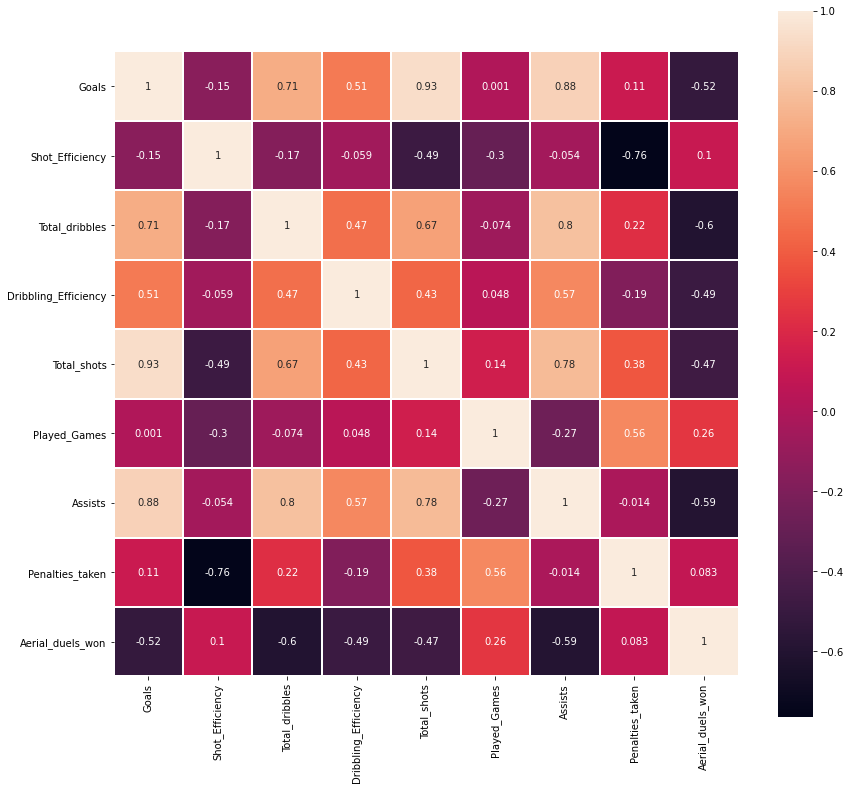

<Figure size 432x288 with 0 Axes>

In [0]:
## Setting up the size of the graph
plt.figure(figsize=(14,13))

### Correlation matrix
sns.heatmap(corr_matrix,linewidths=0.2,vmax=1.0, square=True, linecolor="white",annot=True)

## MOSTRAR MATRIZ
display(plt.show())
plt.gcf().clear()

This graph is very interesting, showing us the correlation between the different offensive aspects.
Some are pretty surprising, as the impact goals have the in the number of assists the player gets. This could be explained
due to the fact that a dangerous striker grabs a lot of attention from the defenders, thus creating opportunities for their teammates.

#Radarchart: comparing Messi to the top 10 scorers in La Liga

### We will have to import some futher libraries to create our Radarchart

In [0]:
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.offsetbox import AnnotationBbox, TextArea, HPacker, VPacker
from PIL import Image

And we will define a few functions just to future proof the code in case the libraries change

In [0]:
def get_coordinates(n):
    """
    Function for getting coordinates and rotation values for the labels.

    Args:
        n (int): number of labels.

    Returns:
        list: coordinate and rotation values.
    """    

    ## calculate alpha
    alpha = 2 * np.pi/n

    ## rotation values
    alphas = alpha * np.arange(n)

    ## x-coordinate value
    coord_x = np.cos(alphas)

    ## y-coordinate value
    coord_y = np.sin(alphas)

    return np.c_[coord_x, coord_y, alphas]

def get_vertex_coord(old_value, old_min, old_max, new_min, new_max):
    """
    Function for getting coordinate for each vertex of the polygon.

    Args:
        old_value, old_min, old_max, new_min, new_max -- float values.

    Returns:
        float: the coordinate value either x or y.
    """    

    ## calculate the value
    new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

    return new_value

def get_indices_between(range_list, coord_list, value, reverse):
    """
    Function to get the x-coordinate and y-coordinate for the polygon vertex.

    Args:
        range_list (list): range value for a particular parameter.
        coord_list (list): coordinate values where the numerical labels are placed.
        value (float): the value of the parameter.
        reverse (bool): to tell whether the range values are in reversed order or not.

    Returns:
        tuple: x-coordinate and y-coordinate value.
    """    

    ## getting index value
    idx_1, idx_2 = get_index(array=range_list, value=value, reverse=reverse)

    ## get x coordinate
    x_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 0],
        new_max=coord_list[idx_2, 0]
    )

    ## get y coordinate
    y_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 1],
        new_max=coord_list[idx_2, 1]
    )

    return x_coord, y_coord

def get_index(array, value, reverse):
    """
    Function to get the indices of two list items between which the value lies.

    Args:
        array (list): containing numerical values.
        value (float/int): value to be searched.
        reverse (bool): whether or not the range values are in reverse order.

    Returns:
        int: the two indices between which value lies.
    """    

    if reverse == True:
        ## loop over the array/list
        for i in range(0, len(array) - 1):
            if array[i] >= value >= array[i+1]:
                return i, i+1

    ## loop over the array/list
    for i in range(0, len(array) - 1):
        if array[i] <= value <= array[i+1]:
            return i, i+1

def set_labels(ax, label_value, label_axis):
    """
    Function to set label for a given axis.

    Args:
        ax (axes.Axes): axis object.
        label_value (list): ticklabel values.
        label_axis (str): axis name, 'x' or 'y'

    Returns:
        list: label names
    """    

    if label_axis == 'x':
        ax.set_xticks(np.arange(len(label_value)))
        axis = ax.get_xticklabels()
    else:
        ax.set_yticks(np.arange(len(label_value)) + 1)
        axis = ax.get_yticklabels()
    
    ## fetch labels
    labels = [items.get_text() for items in axis]

    ## init a count variable
    if label_axis == 'x':
        count = 0
    else:
        count = len(label_value) - 1
    
    ## iterate through all the labels and change the label name
    for i in range(len(labels)):
        labels[i] = label_value[count]

        if label_axis == 'x':
            count += 1
        else:
            count -= 1
    
    return labels            

def add_image(image, fig, left, bottom, width=None, height=None, **kwargs):
    """
    -----> The method is taken from mplsoccer package (from github) <-----
    -----> Andy Rowlinson(@numberstorm) <-----

    Adds an image to a figure using fig.add_axes and ax.imshow

    Args:
        image (str): image path.
        fig (matplotlib.figure.Figure): figure object
        left (float): The left dimension of the new axes.
        bottom (float): The bottom dimension of the new axes.
        width (float, optional): The width of the new axes. Defaults to None.
        height (float, optional): The height of the new axes. Defaults to None.
        **kwargs: All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        matplotlib.figure.Figure: figure object.
    """    
    ## open image
    image = Image.open(image)

    ## height, width, channel of shape
    shape = np.array(image).shape
    
    image_height, image_width =  shape[0], shape[1]
    image_aspect = image_width / image_height
    
    figsize = fig.get_size_inches()
    fig_aspect = figsize[0] / figsize[1]
    
    if height is None:
        height = width / image_aspect * fig_aspect
    
    if width is None:
        width = height*image_aspect/fig_aspect
    
    ## add image
    ax_image = fig.add_axes((left, bottom, width, height))
    ax_image.axis('off')  # axis off so no labels/ ticks
    
    ax_image.imshow(image, **kwargs)
    
    return fig

def plot_text(x, y, text, text_dict, ax, color_rest='k', align="left", fontsize=None, **kwargs):
    """
    Function to plot text.

    Args:
        x (float): x-coodrinate value for text.
        y (float): y-coodrinate value for text.
        text (str): the text that will be plotted.
        text_dict (dict): contains words that the user wants to format.
        ax (axes.Axes): axis object.
        color_rest (str, optional): color for the string. Defaults to 'k'.
        align (str, optional): alignment, can have these values {'top', 'bottom', 'left', 'right', 'center', 'baseline'}. Defaults to "left". 
        fontsize (float, optional): size of the font. Defaults to None.
        **kwargs(optional): All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        axes.Axes: axis object
    """    

    ## init an empty list and a count variable to 0
    hpacker_list = []
    count = 0
    
    for sentence in text.split('\n'):
        ## init an empty string and list
        temp_string = ""
        temp_hpacker = []
        
        for word in sentence.split(' '):
            present = text_dict.get(word)
            
            if present == None:
                temp_string += (word + " ")
                
            elif present and temp_string != "":
                if type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                textbox = TextArea(
                    temp_string.strip(),
                    textprops = dict(
                        color = color_rest,  
                        size = size,
                        **kwargs
                    )
                )
                temp_hpacker.append(textbox)
                temp_string = ""
            
            if present:
                if present.get("color") == None:
                    color = color_rest
                else:
                    try:
                        color = present["color"]
                    except Exception:
                        color = present["fontcolor"]

                if present.get("ignore") == True:
                    word = word.replace('_', ' ')
                    del present["ignore"]

                if present.get("size") or present.get("fontsize"):
                    try:
                        size = present["fontsize"]
                    except Exception:
                        size = present["size"]
                elif type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                if present.get("ignore_last") == True:
                    w_1 = word[:-1]
                    w_2 = word[-1]
                    del present["ignore_last"]

                    textbox_1 = TextArea(
                        w_1,
                        textprops = dict(      
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )

                    textbox_2 = TextArea(
                        w_2,
                        textprops = dict(      
                            present,
                            color = color_rest,
                            size = size,
                            **kwargs
                        )
                    )    

                    temp_box = HPacker(children=[textbox_1, textbox_2], align=align, pad=0, sep=0)
                    temp_hpacker.append(temp_box)

                else:
                    textbox = TextArea(
                        word,
                        textprops = dict(      
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )
                    temp_hpacker.append(textbox)
        
        if len(temp_string) > 0:
            if type(fontsize) == list:
                size = fontsize[count]
            else:
                size = fontsize

            textbox = TextArea(
                temp_string.strip(),
                textprops = dict(
                    color = color_rest,    
                    size = size,
                    **kwargs
                )
            )
            temp_hpacker.append(textbox)
        
        count += 1
        box_h = HPacker(children=temp_hpacker, align=align, pad=0, sep=4)
        hpacker_list.append(box_h)
        
    final_box = VPacker(children=hpacker_list, pad=0, sep=4)

    text = AnnotationBbox(final_box, (x, y), frameon=False)
    ax.add_artist(text)
    
    return ax    

In [0]:
class Radar:
    """
    class contains methods to make radar-chart.
    """

    def __init__(
        self, background_color="#FFFFFF", patch_color="#D6D6D6", fontfamily="Liberation Serif", 
        label_fontsize=10, range_fontsize=6.5, label_color="#000000", range_color="#000000"
        ):
        """
        Function to initialize the object of the class.

        Args:
            background_color (str, optional): the background color. Defaults to "#FFFFFF".
            patch_color (str, optional): the color for our circle. Defaults to "#D6D6D6".
            fontfamily (str, optional): fontfamily available in matplotlib. Defaults to "Liberation Serif".
            label_fontsize (float, optional): the fontsize of label. Defaults to 10.
            range_fontsize (float, optional): the fontsize for range values. Defaults to 6.5.
            label_color (str, optional): color value for labels. Defaults to "#000000".
            range_color (str, optional): color value for ranges. Defaults to "#000000".
        """        
        self.background_color = background_color
        self.patch_color = patch_color
        self.fontfamily = fontfamily
        self.label_fontsize = label_fontsize
        self.range_fontsize = range_fontsize
        self.label_color = label_color
        self.range_color = range_color

    def plot_radar(self, ranges, params, values, radar_color, filename=None, dpi=300,
                   title=dict(), alphas=[0.6, 0.6], compare=False, endnote=None, 
                   end_size=9, end_color="#95919B", image=None, image_coord=None, figax=None, **kwargs):
        """
        Function to plot radar-chart.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            params (list): list of string values containing the name of parameters.
            values (list): list of float values for each parameters/ nested list when making comparison charts.
            radar_color (list): list of two color values.
            filename (str, optional): the name per which the file will be saved added extension. Defaults to None.
            dpi (int, optional): dots per inch value. Defaults to 300.
            title (str, optional): containing information of title and subtitle. Defaults to dict().
            alphas (list, optional): alpha value for color. Defaults to [0.6, 0.6].
            compare (bool, optional): True, if comparison charts are to be made. Defaults to False.
            endnote (str, optional): the endnote of the plot. Defaults to None.
            end_size (int, optional): the font-size for the endnote string. Defaults to 9.
            end_color (str, optional): color of the endnote. Defaults to "#95919B".
            image (str, optional): image name to be added. Defaults to None.
            image_coord (list, optional): containing left, bottom, width, height for image. Defaults to None.
            figax tuple, optional): figure and axis object. Defaults to None.
            **kwargs --  All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

        Returns:
            matplotlib.figure.Figure: figure object.
            axes.Axes: axis object.
        """        
        
        ## assert required conditions 
        assert len(ranges) >= 3, "Length of ranges should be greater than equal to 3"
        assert len(params) >= 3, "Length of params should be greater than equal to 3"

        if compare == True:
            ## for making comparison radar charts
            assert len(values) == len(radar_color) == len(alphas), "Length for values, radar_color and alpha do not match"
        else:
            assert len(values) >= 3, "Length of values should be greater than equal to 3"
            assert len(ranges) == len(params) == len(values), "Length for ranges, params and values not matched"

        if figax:
            fig, ax = figax
        else:
            fig, ax = plt.subplots(figsize=(20, 10), facecolor=self.background_color)
            ax.set_facecolor(self.background_color)

        ## set axis
        ax.set_aspect('equal')
        ax.set(xlim=(-22, 22), ylim=(-23, 25))

        if type(radar_color) == str:
            ## make radar_color a list
            radar_color = [radar_color]
            radar_color.append('#D6D6D6')

        ## add labels around the last circles
        ax = self.__add_labels(params=params, ax=ax)

        ## add ranges
        ax, xy, range_values = self.__add_ranges(ranges=ranges, ax=ax,)

        if compare == True:
            ## for making comparison radar charts

            for i in range(len(values)):
                ## fetch value
                value = values[i]

                ## get vertices
                vertices = self.__get_vertices(value, xy, range_values)

                ## make the radar chart
                ax = self.__plot_circles(ax=ax, radar_color=radar_color[i], vertices=vertices, alpha=alphas[i], compare=True)

        else:
            ## get vertices
            vertices = self.__get_vertices(values, xy, range_values)

            ## make the radar chart
            ax = self.__plot_circles(ax=ax, radar_color=radar_color, vertices=vertices)
        
        ## add credits 
        ax.text(22, -21.5, 'Inspired By: Statsbomb / Rami Moghadam', fontfamily=self.fontfamily, ha='right',
                fontdict={"color": end_color}, fontsize=end_size)

        ## add endnote
        if endnote != None:
            y_add = -22.5
            for note in endnote.split('\n'):
                ax.text(22, y_add, note, fontfamily=self.fontfamily, ha='right',
                        fontdict={"color": end_color}, fontsize=end_size)
                y_add -= 1

        ## tidy axis
        ax.axis('off')
        
        if len(title) > 0:
            ax = self.__plot_titles(ax, title)

        ## add image
        if image != None and image_coord != None:
            fig = add_image(image, fig, image_coord[0], image_coord[1], image_coord[2], image_coord[3], **kwargs)

        if filename:
            fig.savefig(filename, dpi=dpi, bbox_inches='tight')

        return fig, ax

    def __plot_titles(self, ax, title):
        """
        Function for plotting title values to the radar-chart.

        Args:
            ax (axes.Axes): axis object.
            title (dict): containing information of title and subtitle.

        Returns:
            axes.Axes: axis object.
        """        

        if title.get('title_color') == None:
            ## add title color
            title['title_color'] = '#000000'

        if title.get('subtitle_color') == None:
            ## add a subtitle color
            title['subtitle_color'] = '#000000'

        if title.get('title_fontsize') == None:
            ## add titile fontsize
            title['title_fontsize'] = 20
        
        if title.get('sub_title_fontsize') == None:
            ## add subtitle fontsize
            title['subtitle_fontsize'] = 15

        if title.get('title_fontsize_2') == None:
            ## add title fontsize 2
            title['title_fontsize_2'] = title['title_fontsize']

        if title.get('subtitle_fontsize_2') == None:
            ## add subtitle fontsize 2
            title['subtitle_fontsize_2'] = title['subtitle_fontsize']   

        if title.get('title_name'):
            ## plot the title name
            ax.text(-22, 24, title['title_name'], fontsize=title['title_fontsize'], fontweight='bold', 
                    fontdict={'color': title['title_color']}, fontfamily=self.fontfamily)
        
        if title.get('subtitle_name'):
            ## plot the title name
            ax.text(-22, 22, title['subtitle_name'], fontsize=title['subtitle_fontsize'], 
                    fontdict={'color': title['subtitle_color']}, fontfamily=self.fontfamily)

        if title.get('title_color_2') == None:
            ## add title color
            title['title_color_2'] = '#000000'
        
        if title.get('subtitle_color_2') == None:
            ## add subtitle color
            title['subtitle_color_2'] = '#000000'
        
        if title.get('title_name_2'):
            ## plot the second title name
            ax.text(22, 24, title['title_name_2'], fontsize=title['title_fontsize_2'], fontweight='bold', 
                    fontdict={'color': title['title_color_2']}, ha='right', fontfamily=self.fontfamily)
        
        if title.get('subtitle_name_2'):
            ## plot the second subtitle name
            ax.text(22, 22, title['subtitle_name_2'], fontsize=title['subtitle_fontsize_2'], 
                    fontdict={'color': title['subtitle_color_2']}, ha='right', fontfamily=self.fontfamily) 
        
        return ax

    def __plot_circles(self, ax, radar_color, vertices, alpha=None, compare=False):
        """
        Function to plot concentric circles.

        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.

        Returns:
            axes.Axes: axis object.
        """        

        ## radius value for each circle
        radius = [3.35, 6.7, 10.05, 13.4, 16.75]

        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2

        if compare:    ## for making comparison radar charts
            ## plot a polygon
            radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle+1, alpha=alpha)
            ax.add_patch(radar_1)
        else:
            ## plot a polygon
            radar_1 =  Polygon(vertices, fc=radar_color[0], zorder=zorder_circle-1)
            ax.add_patch(radar_1)

        ## create concentric circles 
        for rad in radius:
            ## create circle
            circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=self.patch_color, lw=lw_circle, zorder=zorder_circle)
            ax.add_patch(circle_1)

            if compare == False:
                ## create another circle to fill in second color
                circle_2 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=radar_color[1], lw=lw_circle, zorder=zorder_circle+1)
                circle_2.set_clip_path(radar_1)
                ax.add_patch(circle_2)
        
        return ax

    def __add_labels(self, params, ax, return_list=False, radius=19, range_val=False):
        """
        Function to add labels around the last circle.

        Args:
            params (list): values containing the name of parameters.
            ax (axes.Axes): axis object.
            return_list (bool, optional): x and y values. Defaults to False.
            radius (int, optional): radius of the circle around which labels are to be align. Defaults to 19.
            range_val (bool, optional): to specify whether to plot range or not. Defaults to False.

        Returns:
            axes.Axes: axis object.
            list: coordinate values (if return_list == True)
        """        
        
        ## get coordinates and rotation values
        coord = get_coordinates(n=len(params))

        if return_list == True:
            x_y = []

        for i in range(len(params)):
            ## fetch rotation value
            rot = coord[i, 2]

            ## the x and y coordinate for labels
            x, y = (radius*np.sin(rot), radius*np.cos(rot))

            if return_list == True:
                ## add x_y cordinates 
                tup_temp = (x, y)
                x_y.append(tup_temp)

            if y < 0:
                rot += np.pi

            if type(params[i]) == np.float64:
                p = round(params[i], 2)
            else:
                p = params[i]

            if range_val == True:
                size = self.range_fontsize
                color = self.range_color
            else:
                size = self.label_fontsize
                color = self.label_color
        
            ax.text(x, y, p, rotation=-np.rad2deg(rot), ha='center', va='center', 
                    fontsize=size, fontfamily=self.fontfamily, fontdict=dict(color=color))
        
        if return_list == True:
            return ax, x_y
        else:
            return ax

    def __add_ranges(self, ranges, ax):
        """
        Function to add range value around each circle.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            ax (axes.Axes): axis object.

        Returns:
            axes.Axes: axis object.
            numpy.array: x and y coordinate for each numerical range values.
            numpy.array: range value for each parameter.
        """        

        ## radius value for every circle
        radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]

        ## x and y coordinate values for range numbers
        x_y = []

        ## range values for every ranges
        range_values = np.array([])

        for rng in ranges:
            value = np.linspace(start=rng[0], stop=rng[1], num=10)
            range_values = np.append(range_values, value)
        
        range_values = range_values.reshape((len(ranges),10))

        for i in range(len(radius)):

            ## parameter list
            params = range_values[:, i]

            ax, xy = self.__add_labels(params=params, ax=ax, return_list=True, radius=radius[i], range_val=True)
            x_y.append(xy)

        return ax, np.array(x_y), range_values

    def __get_vertices(self, values, xy, range_values):
        """
        Function to get vertex coordinates(x and y) for the required polygon.

        Args:
            values (list): value for each parameter.
            xy (numpy.array): coordinate values for each label-number.
            range_values (numpy.array): range value for each parameter.

        Returns:
            numpy.array: coordinates for each vertex of the polygon.
        """        

        ## init an empty list
        vertices = []

        ## calculating coordinate values
        for i in range(len(range_values)):
            
            ## list of range value for each parameter
            range_list = range_values[i, :]
            coord_list = xy[:, i]

            if range_list[0] > range_list[-1]:
                ## if range values are in reversed order
                if values[i] >= range_list[0]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                elif values[i] <= range_list[-1]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=True)

            else:
                if values[i] >= range_list[-1]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                elif values[i] <= range_list[0]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=False)

            ## add x-y coordinate in vertices as a list
            vertices.append([x_coord, y_coord])
        
        return vertices       

    def __repr__(self):
        return f"""{self.__class__.__name__}(
            background_color={self.background_color},
            patch_color={self.patch_color},
            fontfamily={self.fontfamily},
            label_fontsize={self.label_fontsize},
            range_fontsize={self.range_fontsize},
            label_color={self.label_color},
            range_color={self.range_color}
        )"""

    ## __str__ is the same as __repr__
    __str__ = __repr__

### The attributes we will be plotting in our radarchart are: Shot efficiency, penalty efficiency, dribbling efficiency, and aerial duel efficiency.

In [0]:
display(top_scorers)

team,team_id,player_id,player_name,position,known_name,played_time,appearances,played_games,dribbles_successful,dribbles_unsuccessful,keypasses,assists,through_balls,goals,goals_from_inside_box,goals_from_outside_box,goals_penalty,penalty_taken,shots_total,shots_on_target_include_goals,shots_off_target_include_woodwork,shots_hit_woodwork,passes_total,passes_total_exc_crosses_and_corners_succesful,passes_total_exc_crosses_and_corners_unsuccesful,duels_total,duels_won,duels_lost,duels_ground_total,duels_ground_won,duels_ground_lost,duels_aerial_total,duels_aerial_won,duels_aerial_lost,interceptions,recoveries,Shot_Efficiency,Dribbling_Efficiency,Penalties_efficiency,Aerial_duels_efficiency,Total_dribbles
Barcelona,178,19054,Lionel Messi,Forward,null,2880,33,33,182,81,68,21,36,25,16,9,5,5,115,71,44,4,1975,1631,344,482,283,199,469,273,196,13,10,3,7,56,0.21739130434782608,0.6920152091254753,1.0,0.7692307692307693,263
Real Madrid,186,19927,Karim Benzema,Forward,null,3152,37,37,38,30,51,8,9,21,20,1,5,5,107,60,47,5,1285,1108,177,241,100,141,174,71,103,67,29,38,7,71,0.19626168224299065,0.5588235294117647,1.0,0.43283582089552236,68
Villarreal,449,93721,Gerard Moreno,Forward,Gerard Moreno,2752,35,35,60,35,44,5,9,18,18,0,1,2,71,35,36,3,963,717,246,422,182,240,279,126,153,143,56,87,10,98,0.2535211267605634,0.631578947368421,0.5,0.3916083916083916,95
Barcelona,178,39336,Luis Suárez,Forward,null,2001,28,28,23,24,18,8,1,16,13,3,1,1,63,42,21,4,654,494,160,142,63,79,122,51,71,20,12,8,1,36,0.25396825396825395,0.48936170212765956,1.0,0.6,47
Athletic Club,174,18498,Raúl García,Midfielder,Raúl García,2876,35,35,9,17,21,1,5,15,12,3,7,7,75,34,41,2,938,524,414,644,331,313,275,119,156,369,212,157,24,94,0.2,0.34615384615384615,1.0,0.5745257452574526,26
Celta de Vigo,176,40270,Iago Aspas,Forward,null,3266,37,37,52,43,52,3,9,14,12,2,5,7,65,40,25,1,1262,973,289,375,176,199,286,146,140,89,30,59,22,108,0.2153846153846154,0.5473684210526316,0.7142857142857143,0.33707865168539325,95
Sevilla,179,121117,Lucas Ocampos,Midfielder,null,2753,33,33,67,85,21,3,0,14,14,0,5,5,70,36,34,4,839,670,169,482,207,275,413,177,236,69,30,39,22,141,0.2,0.4407894736842105,1.0,0.43478260869565216,152
Mallorca,181,94273,Ante Budimir,Forward,null,2780,35,35,20,27,11,2,0,13,13,0,2,2,46,22,24,2,578,370,208,584,264,320,234,100,134,350,164,186,8,52,0.2826086956521739,0.425531914893617,1.0,0.4685714285714286,47
Atlético de Madrid,175,88482,Álvaro Morata,Forward,null,2103,34,34,19,9,23,2,3,12,12,0,2,3,57,31,26,3,497,320,177,436,222,214,204,91,113,232,131,101,5,67,0.21052631578947367,0.6785714285714286,0.6666666666666666,0.5646551724137931,28
Getafe,1450,109270,Jaime Mata,Forward,null,2757,34,34,14,18,26,3,2,11,11,0,3,4,49,25,24,2,704,467,237,483,190,293,237,85,152,246,105,141,7,94,0.22448979591836735,0.4375,0.75,0.4268292682926829,32


In [0]:
radarchart_data = top_scorers.select("player_name", 'Shot_Efficiency', 'Penalties_efficiency', 'Dribbling_Efficiency', 'Aerial_duels_efficiency')
display(radarchart_data)

player_name,Shot_Efficiency,Penalties_efficiency,Dribbling_Efficiency,Aerial_duels_efficiency
Lionel Messi,0.21739130434782608,1.0,0.6920152091254753,0.7692307692307693
Karim Benzema,0.19626168224299065,1.0,0.5588235294117647,0.43283582089552236
Gerard Moreno,0.2535211267605634,0.5,0.631578947368421,0.3916083916083916
Luis Suárez,0.25396825396825395,1.0,0.48936170212765956,0.6
Raúl García,0.2,1.0,0.34615384615384615,0.5745257452574526
Iago Aspas,0.2153846153846154,0.7142857142857143,0.5473684210526316,0.33707865168539325
Lucas Ocampos,0.2,1.0,0.4407894736842105,0.43478260869565216
Ante Budimir,0.2826086956521739,1.0,0.425531914893617,0.4685714285714286
Álvaro Morata,0.21052631578947367,0.6666666666666666,0.6785714285714286,0.5646551724137931
Jaime Mata,0.22448979591836735,0.75,0.4375,0.4268292682926829


In [0]:
stats_data = radarchart_data.describe()
display(stats_data)

summary,player_name,Shot_Efficiency,Penalties_efficiency,Dribbling_Efficiency,Aerial_duels_efficiency
count,10,10,10,10,10
mean,null,0.22541517900642644,0.8630952380952381,0.5247694472389055,0.5000117856651086
stddev,null,0.028685341028893696,0.18791683321510436,0.11660892825988396,0.12719964028946595
min,Ante Budimir,0.19626168224299065,0.5,0.34615384615384615,0.33707865168539325
max,Álvaro Morata,0.2826086956521739,1.0,0.6920152091254753,0.7692307692307693


We create variables capturing the different limits of our radarchart ranges.

In [0]:
r1=radarchart_data.select(min("Shot_Efficiency")).collect()
print(r1)

[Row(min(Shot_Efficiency)=0.1527777777777778)]


In [0]:
radarchart_data.columns

Out[36]: ['player_name',
 'Shot_Efficiency',
 'Penalties_efficiency',
 'Dribbling_Efficiency',
 'Aerial_duels_efficiency']

In [0]:
r2= radarchart_data.select(max('Shot_Efficiency')).collect()
r3= radarchart_data.select(min("Penalties_efficiency")).collect()
r4 = radarchart_data.select(max("Penalties_efficiency")).collect()
r5 = radarchart_data.select(min("Dribbling_Efficiency")).collect()
r6 = radarchart_data.select(max("Dribbling_Efficiency")).collect()
r7 = radarchart_data.select(min("Aerial_duels_efficiency")).collect()
r8 = radarchart_data.select(max("Aerial_duels_efficiency")).collect()

In [0]:
radarchart_ranges = [(r1,r2),(r3,r4), (r5,r6), (r7,r8)]

#### The initial data type for the columns in the stats_data dataframe need to be changed to strings, which we can do with a for loop.

In [0]:
cols = ['Shot_Efficiency', 'Penalties_efficiency', 'Dribbling_Efficiency', 'Aerial_duels_efficiency']

In [0]:
for col_name in cols:
    stats_data = stats_data.withColumn(col_name, col(col_name).cast('float'))

In [0]:
stats_data.printSchema()

root
 |-- summary: string (nullable = true)
 |-- player_name: string (nullable = true)
 |-- Shot_Efficiency: float (nullable = true)
 |-- Penalties_efficiency: float (nullable = true)
 |-- Dribbling_Efficiency: float (nullable = true)
 |-- Aerial_duels_efficiency: float (nullable = true)



## We can now proceed to create the radarchat comparing the chosen attributes between Lionel Messi and the pool of top 10 scorers of La Liga

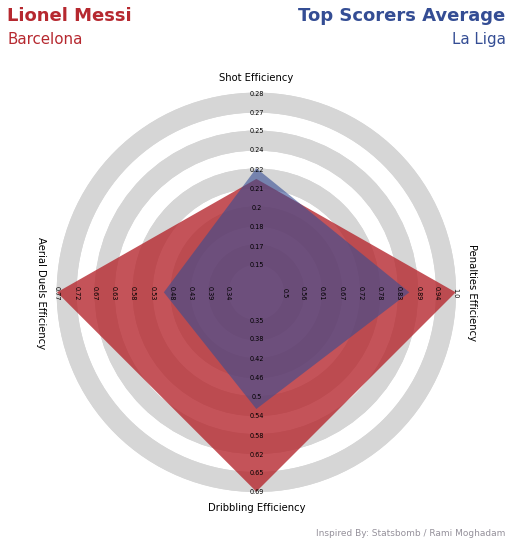

In [0]:
attributes = ["Shot Efficiency", "Penalties Efficiency", "Dribbling Efficiency", "Aerial Duels Efficiency"]

#Rango de valores:
range_limits = radarchart_ranges

#Valores
values = [
    [radarchart_data.collect()[0][1],radarchart_data.collect()[0][2], radarchart_data.collect()[0][3],radarchart_data.collect()[0][4]], ##Messi
    [stats_data.collect()[1][2], stats_data.collect()[1][3], stats_data.collect()[1][4], stats_data.collect()[1][5]]    ##Average of top scorers
]

## title
titles = dict(
    title_name='Lionel Messi',
    title_color='#B6282F',
    subtitle_name='Barcelona',
    subtitle_color='#B6282F',
    title_name_2='Top Scorers Average',
    title_color_2='#344D94',
    subtitle_name_2='La Liga',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)


## instantiate object 
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges = range_limits, params = attributes, values=values, 
                                 radar_color=['#B6282F', '#344D94'], 
                                 alphas=[0.8, 0.6], title=titles1,
                                 compare=True)